In [1]:
#invite people for the Kaggle party
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
#from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Import Data

In [179]:
#data import
price_data = {}
#pairs = ['LTC', 'ETH', 'ZEC', 'ETC', 'XMR', 'BCH', 'LSK', 'ZRX','GNT','GAS','XRP','REP']
pairs = ['LTC','BCH','ETC','ETH','LSK','OMG','XMR','XRP','ZEC']

for pair in pairs:
    #price_data[pair] = pd.read_csv(('D:/export/BTC{0}_PLN_24Jan18.csv').format(pair), nrows=100000)
    price_data[pair] = pd.read_csv(('D:/export/150118_BTC{0}_PLN.csv').format(pair), nrows=100000)
    

In [180]:
price_data['LTC'].shape, price_data['ZEC'].shape

((100000, 5), (100000, 5))

### Merge data from different pairs' data

In [4]:
# Function to merge dataframes into a single dataframe
def merge_dfs_on_column(dataframes, labels, col):
    '''Merge a single column of each dataframe into a new combined dataframe'''
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

In [181]:
# Merge data
df = merge_dfs_on_column(list(price_data.values()), list(price_data.keys()), 'bestAsk')

### Shift price data to catch price movements

In [182]:
for pair in pairs:
    df[pair+"next"] = df[pair].shift(-1)

### Label price move into 1, -1, 0

In [183]:
# Add next price move columns for each coin
for pair in pairs:
    df[pair+'move'] = '0'
    df.loc[df[pair] < df[pair+'next'], pair+'move'] = '1'
    df.loc[df[pair] > df[pair+'next'], pair+'move'] = '-1'
    df.loc[df[pair] == df[pair+'next'], pair+'move'] = '0'

In [184]:
df2 = df

In [10]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastfive'] = df2[pair+'move'].rolling(min_periods=1,window=5).sum()

In [11]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastten'] = df2[pair+'move'].rolling(min_periods=1,window=10).sum()

In [12]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastfifteen'] = df2[pair+'move'].rolling(min_periods=1,window=15).sum()

In [13]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lasttwenty'] = df2[pair+'move'].rolling(min_periods=1,window=20).sum()

In [30]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastthirty'] = df2[pair+'move'].rolling(min_periods=1,window=30).sum()

In [35]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastfourty'] = df2[pair+'move'].rolling(min_periods=1,window=40).sum()

In [41]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastfifty'] = df2[pair+'move'].rolling(min_periods=1,window=50).sum()

In [45]:
# Making new columns with previous five price move for each pair
for pair in pairs:
    df2[pair+'lastsixty'] = df2[pair+'move'].rolling(min_periods=1,window=60).sum()

In [14]:
# Define a new data frame for last five price move
df5 = pd.DataFrame()
for pair in pairs:
    df5[pair+'lastfive'] = df2[pair+'lastfive']

In [15]:
# Define a new data frame for last five price move
df10 = pd.DataFrame()
for pair in pairs:
    df10[pair+'lastten'] = df2[pair+'lastten']

In [16]:
# Define a new data frame for last five price move
df15 = pd.DataFrame()
for pair in pairs:
    df15[pair+'lastfifteen'] = df2[pair+'lastfifteen']

In [17]:
# Define a new data frame for last five price move
df20 = pd.DataFrame()
for pair in pairs:
    df20[pair+'lasttwenty'] = df2[pair+'lasttwenty']

In [31]:
# Define a new data frame for last five price move
df30 = pd.DataFrame()
for pair in pairs:
    df30[pair+'lastthirty'] = df2[pair+'lastthirty']

In [38]:
# Define a new data frame for last five price move
df40 = pd.DataFrame()
for pair in pairs:
    df40[pair+'lastfourty'] = df2[pair+'lastfourty']

In [42]:
# Define a new data frame for last five price move
df50 = pd.DataFrame()
for pair in pairs:
    df50[pair+'lastfifty'] = df2[pair+'lastfifty']

In [48]:
# Define a new data frame for last five price move
df60 = pd.DataFrame()
for pair in pairs:
    df60[pair+'lastsixty'] = df2[pair+'lastsixty']

In [18]:
df.shape, df2.shape, df5.shape, df10.shape, df15.shape, df20.shape

((60000, 63), (60000, 63), (60000, 9), (60000, 9), (60000, 9), (60000, 9))

In [19]:
df2 = df[['BCHmove', 'ETCmove', 'ETHmove', 'LSKmove', 'LTCmove', 'OMGmove', 'XMRmove', 'XRPmove', 'ZECmove']]
df2 = df2.apply(pd.to_numeric)

In [20]:
df2.corr()

,BCHmove,ETCmove,ETHmove,LSKmove,LTCmove,OMGmove,XMRmove,XRPmove,ZECmove
BCHmove,1.000000,-0.001339,0.003761,-0.016069,-0.016032,-0.011257,0.002991,0.007891,0.001987
ETCmove,-0.001339,1.000000,0.001006,0.002575,0.004272,0.002050,0.001853,0.005472,-0.009977
ETHmove,0.003761,0.001006,1.000000,-0.005055,-0.000622,0.016860,-0.011569,-0.002966,-0.001432
LSKmove,-0.016069,0.002575,-0.005055,1.000000,0.006896,-0.011018,0.001331,0.007326,0.004958
LTCmove,-0.016032,0.004272,-0.000622,0.006896,1.000000,0.001123,0.002057,0.000330,0.010742
OMGmove,-0.011257,0.002050,0.016860,-0.011018,0.001123,1.000000,0.018415,0.005669,0.002463
XMRmove,0.002991,0.001853,-0.011569,0.001331,0.002057,0.018415,1.000000,0.002225,-0.001765
XRPmove,0.007891,0.005472,-0.002966,0.007326,0.000330,0.005669,0.002225,1.000000,-0.002510
ZECmove,0.001987,-0.009977,-0.001432,0.004958,0.010742,0.002463,-0.001765,-0.002510,1.000000


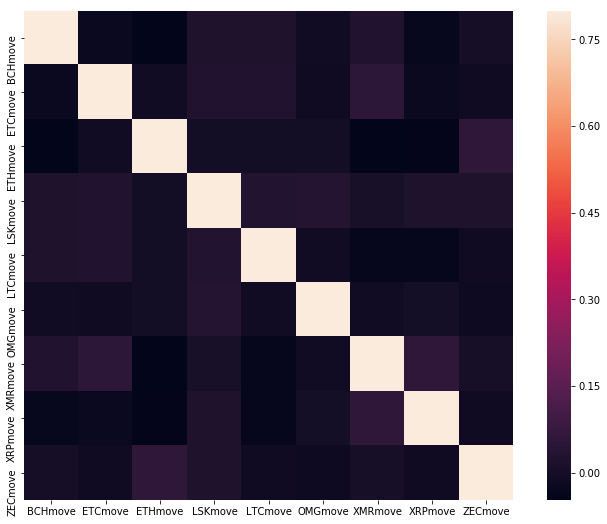

In [177]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

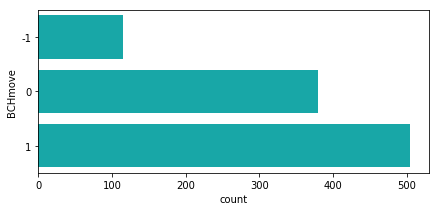

In [178]:
temp = df2.head(1000)
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="BCHmove", data=temp, color="c");

### import libraries for machine learning algorithms

In [21]:
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [22]:
print(__doc__)

import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Automatically created module for IPython interactive environment


### Prepare data sets for training and testing

In [23]:
df1 = df2[['BCHmove','ETCmove','ETHmove','LSKmove','LTCmove','OMGmove','XMRmove','XRPmove','ZECmove']]

In [185]:
# Define X, Y for previous ten price move data set
X = df10.drop('BCHlastten',axis=1)
Y = df2['BCHmove']

In [183]:
# Define X, Y for previous five price move data set
X = df5.drop('BCHlastfive',axis=1)
Y = df2['BCHmove']

In [180]:
# Define X, Y for last price move data set 
X = df1.drop('BCHmove',axis=1)
Y = df1['BCHmove']

In [24]:
# Define X, Y for last price move data set 
X = df15.drop('BCHlastfifteen',axis=1)
Y = df1['BCHmove']

In [28]:
# Define X, Y for last price move data set 
X = df20.drop('BCHlasttwenty',axis=1)
Y = df1['BCHmove']

In [32]:
# Define X, Y for last price move data set 
X = df30.drop('BCHlastthirty',axis=1)
Y = df1['BCHmove']

In [39]:
# Define X, Y for last price move data set 
X = df40.drop('BCHlastfourty',axis=1)
Y = df1['BCHmove']

In [51]:
# Define X, Y for last price move data set 
X = df50.drop('BCHlastfifty',axis=1)
Y = df1['BCHmove']

In [82]:
# Define X, Y for last price move data set 
X = df60.drop('BCHlastsixty',axis=1)
Y = df1['BCHmove']

In [33]:
X.shape, Y.shape

((60000, 8), (60000,))

In [25]:
# categories existing in the data set
pd.unique(Y)

array([-1,  1,  0], dtype=int64)

### Testing Models

##### Automatically Growing size of historical feeds

In [185]:
dfset = {}
dfset1 = {}

In [186]:
for j in ['1','5','10','15','20','25','30','40','50','60','70','80','90','100']:
    dfset[j] = pd.DataFrame()
    dfset1[j] = pd.DataFrame()

In [187]:
for j in ['1','5','10','15','20','25','30','40','50','60','70','80','90','100']:
    for pair in pairs:
        df2[pair+j] = df2[pair+'move'].rolling(min_periods=1,window=int(j)).sum()
        dfset[j][pair+j] = df2[pair+j]

In [188]:

for i in ['1000','10000','30000','60000','100000']:
    for j in ['1','5','10','15','20','25','30','40','50','60','70','80','90','100']:
        dfset1[j] = dfset[j].head(int(i))

In [192]:
# Making new columns with previous five price move for each pair

#acc = pd.DataFrame(columns=('nrows','feeds','rates'))

knn = KNeighborsClassifier(n_neighbors = 3)

rows = []
columns = ['nrows','feeds', 'scores']

for i in ['1000','10000','30000','60000','100000']:
    for j in ['1','5','10','15','20','25','30','40','50','60','70','80','90','100']:
        dfin = dfset1[j].head(int(i))
        X = dfin.drop('BCH'+j,axis=1)
        Y = dfset['1']['BCH1'].head(int(i))
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=18)#42 #12
        
        modelV = knn.fit(X_train, Y_train)
        Y_pred = modelV.predict(X_test)
        score = modelV.score(X_test,Y_test)*100
        
        print(i,j,score)
        row = [i,j,score]
        rows.append(row)

acc = pd.DataFrame(rows, columns=columns)

1000 1 51.3333333333
1000 5 57.6666666667
1000 10 55.6666666667
1000 15 59.6666666667
1000 20 58.0
1000 25 59.3333333333
1000 30 57.6666666667
1000 40 60.0
1000 50 60.0
1000 60 58.6666666667
1000 70 58.0
1000 80 60.0
1000 90 62.0
1000 100 57.6666666667
10000 1 42.7666666667
10000 5 49.2333333333
10000 10 58.4
10000 15 61.3333333333
10000 20 61.9
10000 25 62.3333333333
10000 30 63.3
10000 40 63.1333333333
10000 50 63.6
10000 60 62.9333333333
10000 70 62.6333333333
10000 80 63.3333333333
10000 90 62.1
10000 100 62.9666666667
30000 1 43.0
30000 5 46.4777777778
30000 10 53.3
30000 15 56.4888888889
30000 20 57.2111111111
30000 25 58.0666666667
30000 30 58.1777777778
30000 40 58.3444444444
30000 50 58.0888888889
30000 60 58.1444444444
30000 70 58.3111111111
30000 80 58.1888888889
30000 90 58.0
30000 100 58.3777777778
60000 1 42.3333333333
60000 5 44.7055555556
60000 10 51.0944444444
60000 15 55.1111111111
60000 20 55.8055555556
60000 25 56.3611111111
60000 30 56.6722222222
60000 40 56.944444

In [193]:
acc['feeds'] = pd.to_numeric(acc['feeds'])

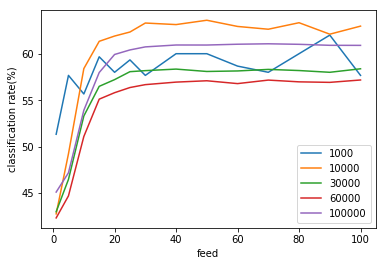

In [194]:
fig,ax = plt.subplots()

for nrow in ['1000','10000','30000','60000','100000']:
    ax.plot(acc[acc.nrows==nrow].feeds,acc[acc.nrows==nrow].scores,label=nrow)

ax.set_xlabel("feed")
ax.set_ylabel("classification rate(%)")
ax.legend(loc='best')

In [52]:
# Validation Set approach
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

accuracyList = {}

clf = tree.DecisionTreeClassifier(class_weight="balanced")
gaussian = GaussianNB()
logreg = LogisticRegression(class_weight="balanced")
boost = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)
forest = RandomForestClassifier(n_estimators = 18)

models = [clf,gaussian,logreg,boost,knn,forest]

for model in models:
    accuracyList[model] = 0
    
for model in models:
    modelV = model.fit(X_train, Y_train)
    Y_pred = modelV.predict(X_test)
    accuracyList[model] = round(modelV.score(X_test,Y_test)*100,3)

#models = [clf,gaussian,logreg,boost,knn,forest]
accResult = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Naive Bayes', 
              'Logistic Regression', 'Decision Tree', 'Gradient Boosting'],
    'Score': [accuracyList[forest], accuracyList[knn], accuracyList[gaussian], 
              accuracyList[logreg], accuracyList[clf], accuracyList[boost]]})
accResult.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,62.922
5,Gradient Boosting,61.517
1,KNN,61.228
3,Logistic Regression,60.439
2,Naive Bayes,60.222
4,Decision Tree,56.744


### Test to draw confusion matrix

In [83]:
forest = RandomForestClassifier(n_estimators = 18)
modelV = model.fit(X_train, Y_train)
Y_pred = modelV.predict(X_test)
print(round(modelV.score(X_test,Y_test)*100,3))

62.767


Confusion matrix, without normalization
[[ 105  791  836]
 [ 340 4163 2293]
 [ 396 2046 7030]]
Normalized confusion matrix
[[ 0.06  0.46  0.48]
 [ 0.05  0.61  0.34]
 [ 0.04  0.22  0.74]]


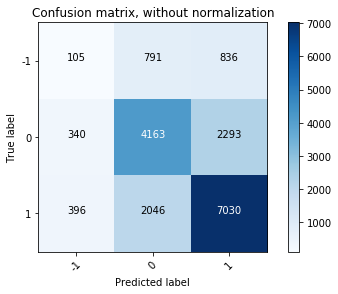

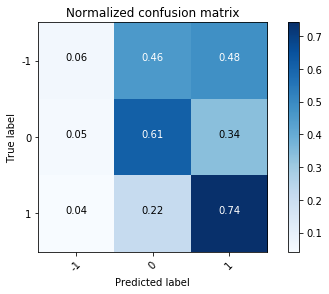

In [84]:
# Plot fonfusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[-1,0,1], normalize=True,
                      title='Normalized confusion matrix')

plt.show()